In [60]:

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns
print("Import Completed")

Import Completed


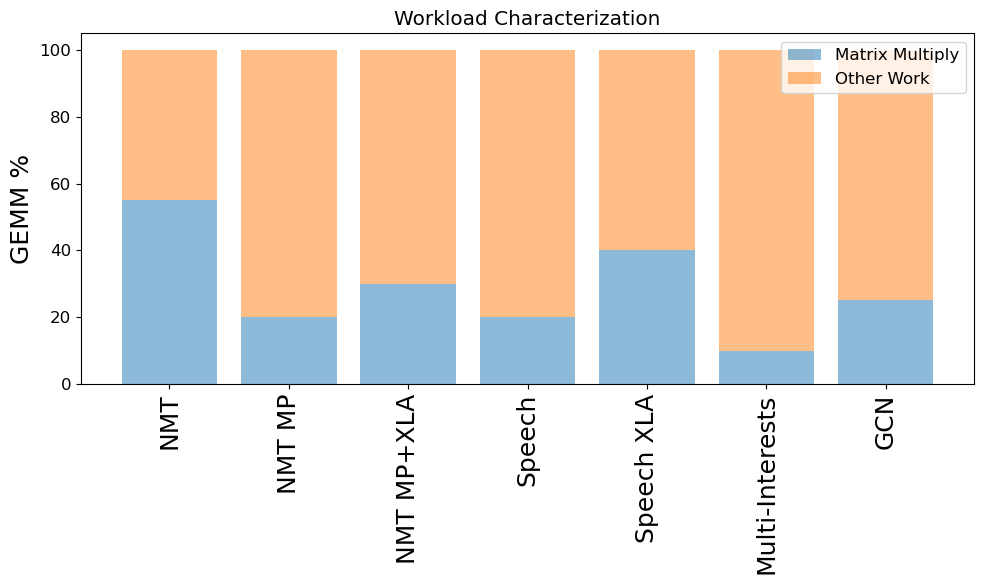

In [61]:
# Workload Characterization Graph

style_ktb = "seaborn-muted"
plt.style.context(style_ktb)
objects = ('NMT', 'NMT MP', 'NMT MP+XLA', 'Speech', 'Speech XLA', 'Multi-Interests', 'GCN')
y_pos = np.arange(len(objects))
gemm_percent = [55,20,30,20,40,10,25]
other_percent = []
for i in gemm_percent:
    other_percent.append(100-i)

plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=18)
plt.rcParams.update({'font.size': 12})
figure(num=None, figsize=(10, 6))
plt.xticks(rotation=90)
# plt.grid(color='r', linestyle='--', linewidth=1)
# plt.rcParams['axes.axisbelow'] = True
p1 = plt.bar(y_pos, gemm_percent, align='center', alpha=0.5)
p2 = plt.bar(y_pos, other_percent, bottom=gemm_percent, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('GEMM %')
plt.title('Workload Characterization')
plt.legend((p1[0], p2[0]),('Matrix Multiply', 'Other Work'))
plt.tight_layout()
plt.savefig('./gemm_percent.pdf')
plt.show()

<Figure size 1000x600 with 0 Axes>

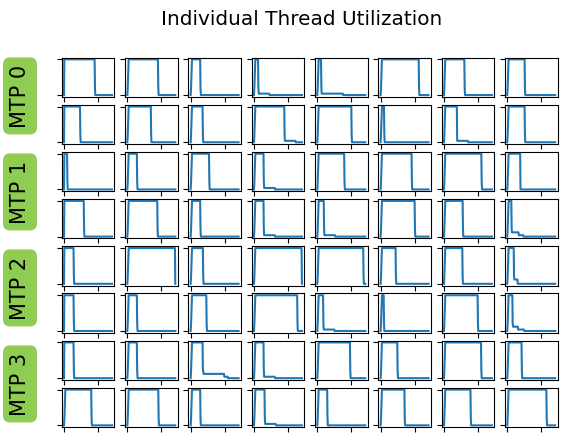

<Figure size 1000x600 with 0 Axes>

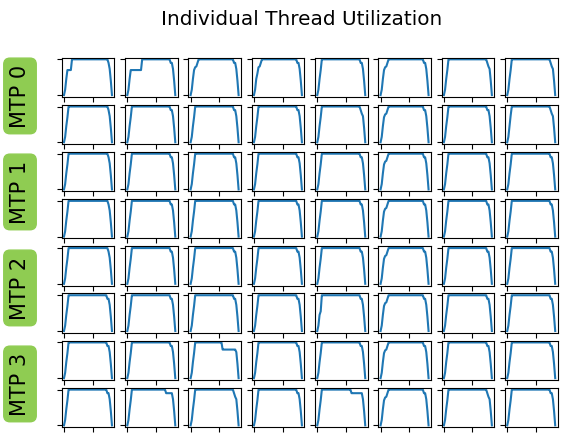

In [62]:
# Thread Utilization Graph
unbalanced_df = pd.read_csv("./thread_data_unbalanced.csv")
balanced_df = pd.read_csv("./thread_data_balanced.csv")

red_val = 0.56
green_val = 0.8
blue_val = 0.32


figure(num=None, figsize=(10, 6))
X_RANGE = 8
Y_RANGE = 8
fig, axs_plots = plt.subplots(X_RANGE, Y_RANGE)
fig.suptitle('Individual Thread Utilization')
for i in range(64):
    x_plot = i % X_RANGE
    y_plot = int(i / Y_RANGE)
    axs_plots[x_plot,y_plot].plot(unbalanced_df["Time"], unbalanced_df["Thread " + str(i)])
    #axs_plots[x_plot,y_plot].axis('off')
    axs_plots[x_plot,y_plot].set_yticklabels([])
    axs_plots[x_plot,y_plot].set_xticklabels([])



fig.text(0.06, 0.8, "MTP 0", size=15, rotation=90.,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(red_val, green_val, blue_val),
                   fc=(red_val, green_val, blue_val),
                   )
         )

fig.text(0.06, 0.6, "MTP 1", size=15, rotation=90.,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(red_val, green_val, blue_val),
                   fc=(red_val, green_val, blue_val),
                   )
         )

fig.text(0.06, 0.4, "MTP 2", size=15, rotation=90.,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(red_val, green_val, blue_val),
                   fc=(red_val, green_val, blue_val),
                   )
         )


fig.text(0.06, 0.2, "MTP 3", size=15, rotation=90.,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(red_val, green_val, blue_val),
                   fc=(red_val, green_val, blue_val),
                   )
         )

#
# fig.text(0.55, 0.6, "spam", size=50, rotation=-25.,
#          ha="right", va="top",
#          bbox=dict(boxstyle="square",
#                    ec=(1., 0.5, 0.5),
#                    fc=(1., 0.8, 0.8),
#                    )
#          )
plt.savefig('./individual_thread_utilization_unbalanced.pdf')
plt.show()

figure(num=None, figsize=(10, 6))
X_RANGE = 8
Y_RANGE = 8
fig, axs_plots = plt.subplots(X_RANGE, Y_RANGE)
fig.suptitle('Individual Thread Utilization')
#fig.suptitle('Horizontally stacked subplots')
for i in range(64):
    x_plot = i % X_RANGE
    y_plot = int(i / Y_RANGE)
    axs_plots[x_plot,y_plot].plot(balanced_df["Time"], balanced_df["Thread " + str(i)])
    #axs_plots[x_plot,y_plot].axis('off')
    axs_plots[x_plot,y_plot].set_yticklabels([])
    axs_plots[x_plot,y_plot].set_xticklabels([])


fig.text(0.06, 0.8, "MTP 0", size=15, rotation=90.,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(red_val, green_val, blue_val),
                   fc=(red_val, green_val, blue_val),
                   )
         )

fig.text(0.06, 0.6, "MTP 1", size=15, rotation=90.,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(red_val, green_val, blue_val),
                   fc=(red_val, green_val, blue_val),
                   )
         )

fig.text(0.06, 0.4, "MTP 2", size=15, rotation=90.,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(red_val, green_val, blue_val),
                   fc=(red_val, green_val, blue_val),
                   )
         )


fig.text(0.06, 0.2, "MTP 3", size=15, rotation=90.,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(red_val, green_val, blue_val),
                   fc=(red_val, green_val, blue_val),
                   )
         )

plt.savefig('./individual_thread_utilization_balanced.pdf')


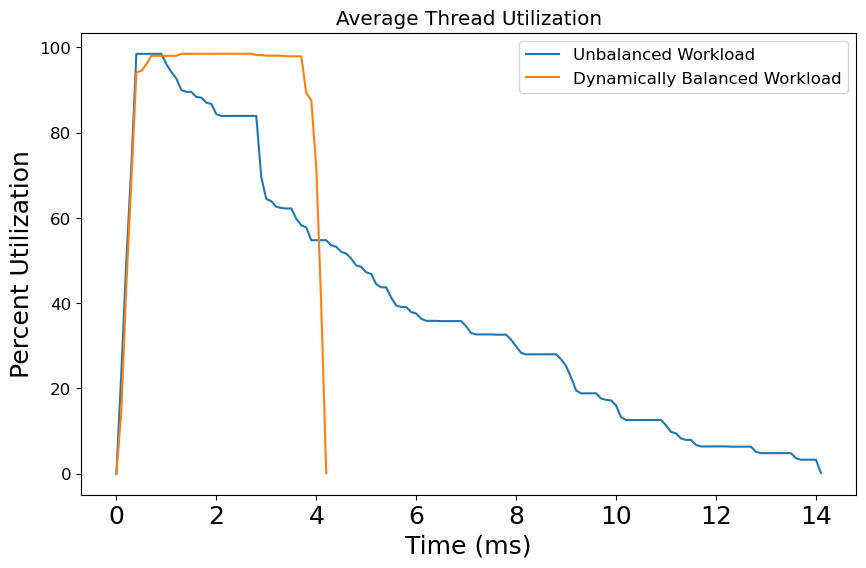

In [63]:
# Average Plot
# total_rows, _ = unbalanced_df.shape
# avg_utilization = []
# for i in range(total_rows):
#     avg_utilization.append()
figure(num=None, figsize=(10, 6))
ax = plt.plot(unbalanced_df["Time"],unbalanced_df.mean(axis = 1), label="Unbalanced Workload")
# figure(num=None, figsize=(10, 6))
ax = plt.plot(balanced_df["Time"],balanced_df.mean(axis = 1), label="Dynamically Balanced Workload")
plt.title("Average Thread Utilization")
plt.xlabel("Time (ms)")
plt.ylabel("Percent Utilization")
plt.legend()
plt.savefig('./average_thread_utilization.pdf')

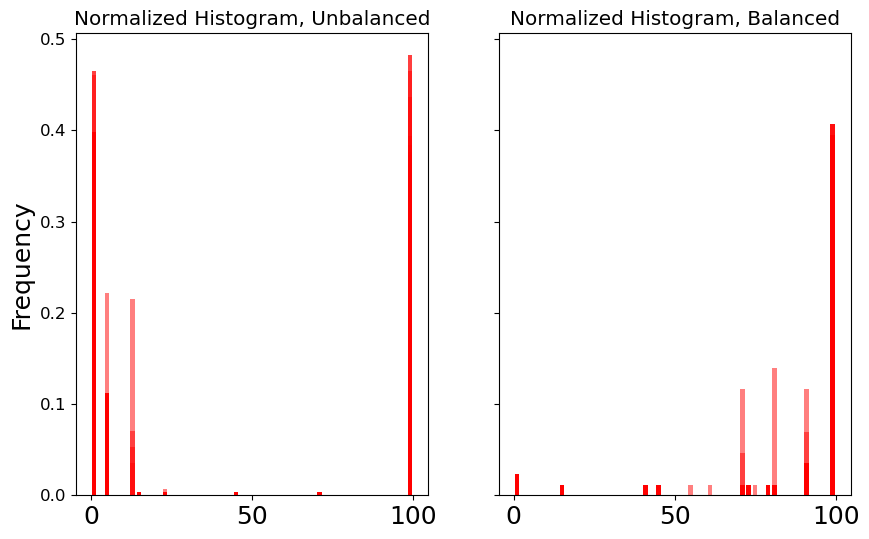

In [67]:
# Histogram Plot
#figure(num=None, figsize=(10, 6))
threads_only_unbalanced_df = unbalanced_df.drop(['Time'], axis=1)
threads_only_balanced_df = balanced_df.drop(['Time'], axis=1)

#fig = plt.figure()
fig, hist_ax = plt.subplots(1,2, sharex='col', sharey='row', figsize=(10, 6))

axs = threads_only_unbalanced_df.plot.hist(bins=50, alpha=0.5, legend=None, density=True, rwidth=0.7,  color = "red", ec = "red", lw=0, ax=hist_ax[0], title='Normalized Histogram, Unbalanced')
#plt.title('Normalized Utilization Histogram, Unbalanced')
#figure(num=None, figsize=(10, 6))
axs = threads_only_balanced_df.plot.hist(bins=50, alpha=0.5, legend=None, density=True, rwidth=0.7,  color = "red", ec = "red", lw=0, ax=hist_ax[1], title='Normalized Histogram, Balanced')
#plt.title("Normalized Utilization Histogram, Balanced")
plt.savefig('./normailized_thread_utilization_histogram.pdf')

In [65]:
#figure(num=None, figsize=(10, 6))
#axs = threads_only_unbalanced_df.plot.hist(bins=50, alpha=0.5, legend=None, rwidth=0.7,  color = "red", ec = "red", lw=0)
#figure(num=None, figsize=(10, 6))
#axs = threads_only_balanced_df.plot.hist(bins=50, alpha=0.5, legend=None, rwidth=0.7,  color = "red", ec = "red", lw=0)

